In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_auc_score, confusion_matrix, balanced_accuracy_score,
                           matthews_corrcoef, cohen_kappa_score, average_precision_score)
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
# Load the datasets
train_data = pd.read_csv('transformed_data/Processed_Auto_Insurance_Fraud_Claims_File01.csv')
val_data = pd.read_csv('transformed_data/Processed_Auto_Insurance_Fraud_Claims_File02.csv')

train_sample = ['Customer_Life_Value1','Age_Insured','Policy_State','Policy_Ded','Policy_Premium','Gender','Education','Property_Damage','Bodily_Injuries','Witnesses','Auto_Model','Vehicle_Cost','Annual_Mileage','DiffIN_Mileage','Total_Claim','Injury_Claim','Property_Claim','License_Validity','Claim_Intensity','Vehicle_Claim','Wait_Policy_BI','Indemnity_Policy_BI','Policy_Duration','Claim_Duration']
# Separate features and target
X_train = train_data[train_sample]
y_train = train_data['Fraud_Ind']

X_val = val_data[train_sample]
y_val = val_data['Fraud_Ind']

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (40000, 24)
Validation set shape: (20000, 24)


In [4]:
# Create directory for models if it doesn't exist
import os
if not os.path.exists('models'):
    os.makedirs('models')

# Define classifiers with their names
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier()
}

# Create dictionary to store results
results = {
    'Model': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': [],
    'Average Precision': [],
    'Matthews Correlation': [],
    'Cohen Kappa': [],
    'Cross-val Score': []
}

# Create and train pipelines for each classifier
for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")
    
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
        ('classifier', classifier)
    ])
    
    # Perform cross-validation on training data
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Train the pipeline on full training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on validation set
    val_pred = pipeline.predict(X_val)
    val_prob = pipeline.predict_proba(X_val)[:, 1]  # Probability scores for ROC AUC
    
    # Calculate all metrics
    accuracy = accuracy_score(y_val, val_pred)
    balanced_acc = balanced_accuracy_score(y_val, val_pred)
    precision = precision_score(y_val, val_pred)
    recall = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    roc_auc = roc_auc_score(y_val, val_prob)
    avg_precision = average_precision_score(y_val, val_prob)
    mcc = matthews_corrcoef(y_val, val_pred)
    kappa = cohen_kappa_score(y_val, val_pred)
    cv_score = cv_scores.mean()
    
    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Balanced Accuracy'].append(balanced_acc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    results['Average Precision'].append(avg_precision)
    results['Matthews Correlation'].append(mcc)
    results['Cohen Kappa'].append(kappa)
    results['Cross-val Score'].append(cv_score)
    
    print(f"{name} Metrics:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Balanced Accuracy: {balanced_acc:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print(f"  Average Precision: {avg_precision:.4f}")
    print(f"  Matthews Correlation: {mcc:.4f}")
    print(f"  Cohen Kappa: {kappa:.4f}")
    print(f"  Cross-validation Score: {cv_score:.4f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nFinal Results:")
print(results_df)

# Save results to CSV
results_df.to_csv('models/benchmark_results.csv', index=False)
print("\nResults saved to 'models/benchmark_results.csv'")


Training Logistic Regression...
Logistic Regression Metrics:
  Accuracy: 0.7360
  Balanced Accuracy: 0.5038
  Precision: 1.0000
  Recall: 0.0075
  F1 Score: 0.0149
  ROC AUC: 0.5928
  Average Precision: 0.3263
  Matthews Correlation: 0.0744
  Cohen Kappa: 0.0110
  Cross-validation Score: 0.7551

Training KNN...
Logistic Regression Metrics:
  Accuracy: 0.7360
  Balanced Accuracy: 0.5038
  Precision: 1.0000
  Recall: 0.0075
  F1 Score: 0.0149
  ROC AUC: 0.5928
  Average Precision: 0.3263
  Matthews Correlation: 0.0744
  Cohen Kappa: 0.0110
  Cross-validation Score: 0.7551

Training KNN...
KNN Metrics:
  Accuracy: 0.9896
  Balanced Accuracy: 0.9840
  Precision: 0.9885
  Recall: 0.9722
  F1 Score: 0.9803
  ROC AUC: 0.9972
  Average Precision: 0.9944
  Matthews Correlation: 0.9733
  Cohen Kappa: 0.9732
  Cross-validation Score: 0.9919

Training SVM...
KNN Metrics:
  Accuracy: 0.9896
  Balanced Accuracy: 0.9840
  Precision: 0.9885
  Recall: 0.9722
  F1 Score: 0.9803
  ROC AUC: 0.9972
  Aver

In [6]:
import joblib

# Save each trained pipeline to a separate .pkl file
for name, classifier in classifiers.items():
    # Recreate the pipeline as in training
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train)
    model_path = f"models/{name.replace(' ', '_').lower()}_pipeline.pkl"
    joblib.dump(pipeline, model_path)
    print(f"Saved {name} pipeline to {model_path}")

Saved Logistic Regression pipeline to models/logistic_regression_pipeline.pkl
Saved KNN pipeline to models/knn_pipeline.pkl
Saved SVM pipeline to models/svm_pipeline.pkl
Saved SVM pipeline to models/svm_pipeline.pkl
Saved Decision Tree pipeline to models/decision_tree_pipeline.pkl
Saved Decision Tree pipeline to models/decision_tree_pipeline.pkl
Saved Random Forest pipeline to models/random_forest_pipeline.pkl
Saved Random Forest pipeline to models/random_forest_pipeline.pkl
Saved Gradient Boosting pipeline to models/gradient_boosting_pipeline.pkl
Saved Gradient Boosting pipeline to models/gradient_boosting_pipeline.pkl
Saved AdaBoost pipeline to models/adaboost_pipeline.pkl
Saved AdaBoost pipeline to models/adaboost_pipeline.pkl
Saved Bagging pipeline to models/bagging_pipeline.pkl
Saved Bagging pipeline to models/bagging_pipeline.pkl
Saved Extra Trees pipeline to models/extra_trees_pipeline.pkl
Saved Extra Trees pipeline to models/extra_trees_pipeline.pkl
Saved XGBoost pipeline to mo

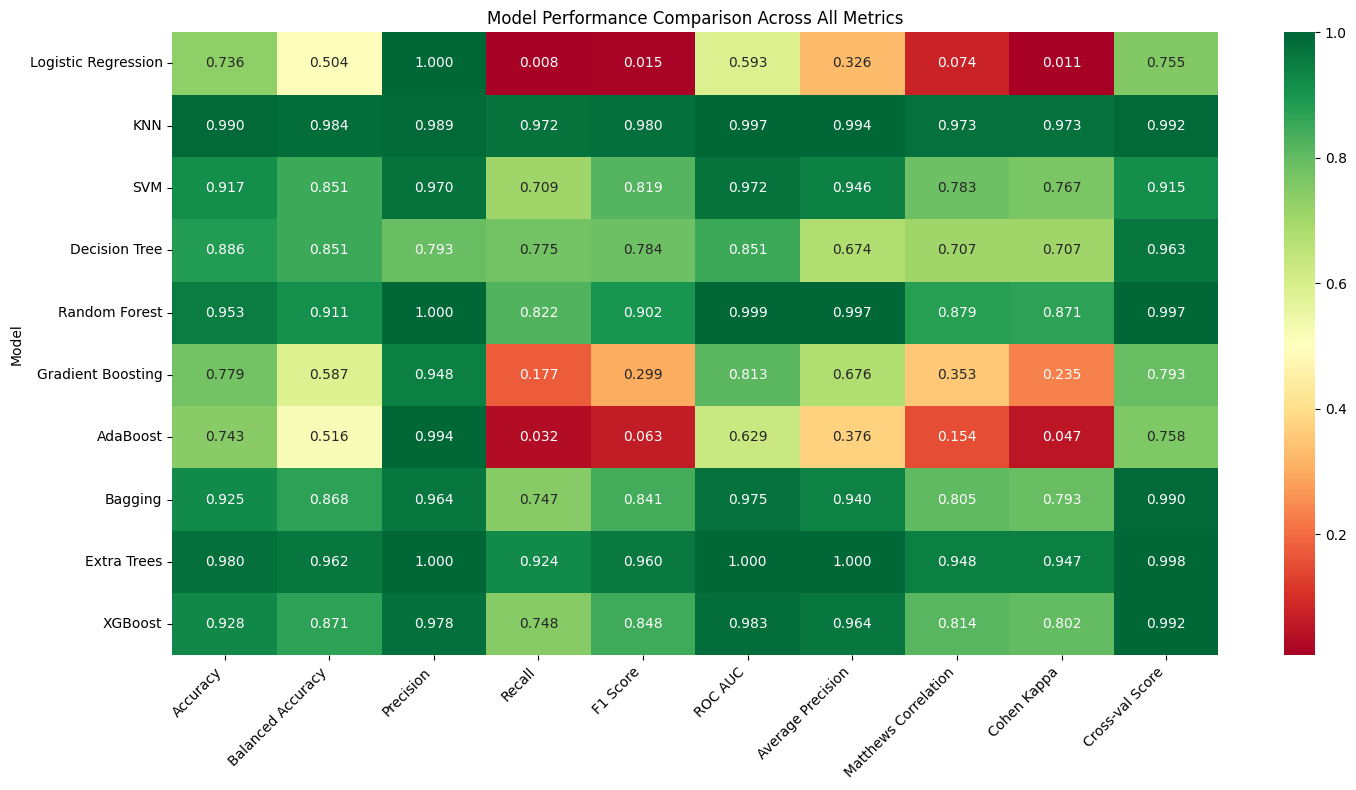

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_27632\1106754189.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_27632\1106754189.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_27632\1106754189.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\KIRAN\AppData\Local\Temp\ipykernel_27632\1106754189.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

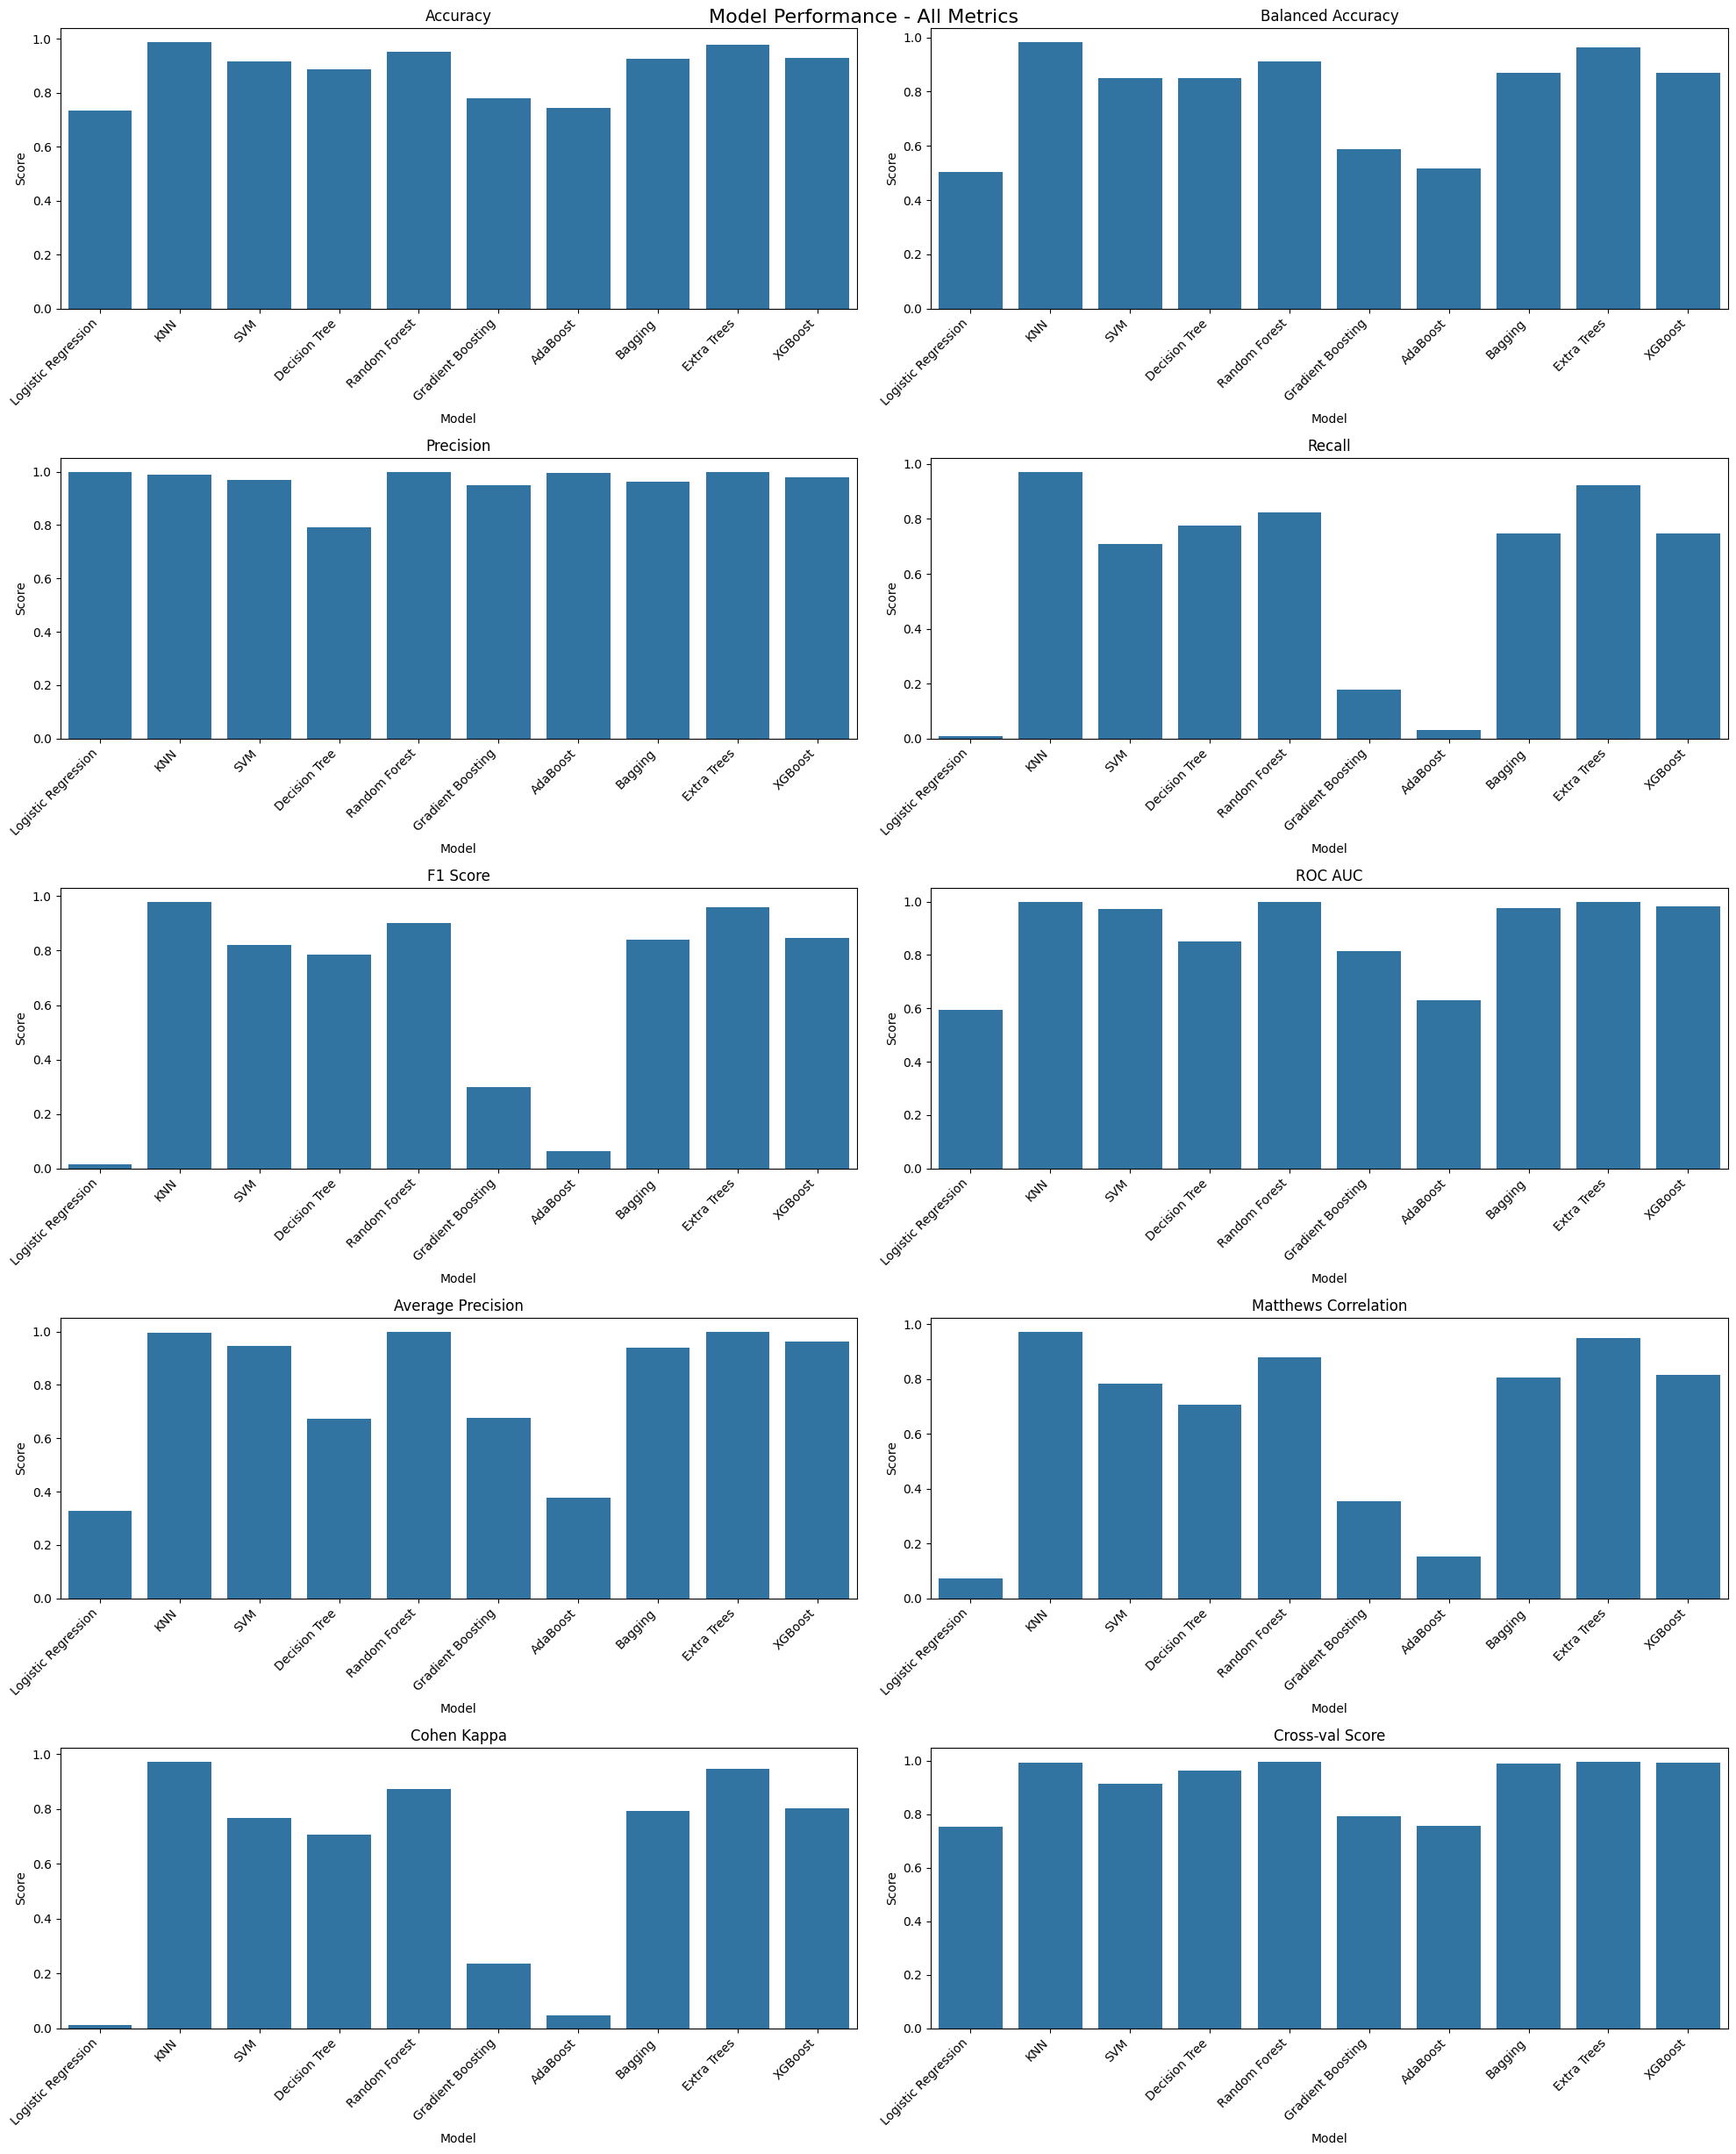

In [7]:
# Create heatmap to visualize all metrics
plt.figure(figsize=(15, 8))
metrics = ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score', 
          'ROC AUC', 'Average Precision', 'Matthews Correlation', 'Cohen Kappa', 'Cross-val Score']
plot_data = results_df.set_index('Model')[metrics]

# Create heatmap
sns.heatmap(plot_data, annot=True, cmap='RdYlGn', fmt='.3f', center=0.5)
plt.title('Model Performance Comparison Across All Metrics')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('models/benchmark_results_heatmap.png')
plt.show()

# Create bar plots for each metric
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Model Performance - All Metrics', fontsize=16)
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    ax = axes[idx]
    scores = results_df[metric]
    
    sns.barplot(x=results_df['Model'], y=scores, ax=ax)
    ax.set_title(metric)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylabel('Score')

plt.tight_layout()
# Save the detailed plots
plt.savefig('models/benchmark_results_detailed.png')
plt.show()